In [1]:
import numpy as np
import pandas as pd

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_purchase=pd.read_csv("E:/HD/BA/ML/Projects Work/Customer Analytics/purchase data.csv")

df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


downloading the pickle files from saved in Customer Segmentation project

In [3]:
scaler=pickle.load(open("scaler.pickle",'rb'))

In [4]:
pca=pickle.load(open("pca.pickle",'rb'))

In [5]:
kmeans_pca=pickle.load(open("kmeans_pca.pickle",'rb'))

Segmenting the Customer data

1) Standrarisation

In [6]:
features=df_purchase.iloc[:,-7:]

features.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,47,1,110866,1,0
1,0,0,47,1,110866,1,0
2,0,0,47,1,110866,1,0
3,0,0,47,1,110866,1,0
4,0,0,47,1,110866,1,0


In [7]:
df_purchase_segn_std=scaler.transform(features)

In [8]:
df_purchase_segn_std=pca.transform(df_purchase_segn_std)

In [9]:
purchase_segm_kmeans_pca=kmeans_pca.predict(df_purchase_segn_std)

In [10]:
df_purchase_predictor=df_purchase.copy()

In [11]:
df_purchase_predictor['segment']=purchase_segm_kmeans_pca

In [12]:
df_purchase_predictor.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1


## Descriptive Analytics by Segments

As reconds contains multiple entries of each customer whne they vist the store and buy product or not ( Incidence = 0 or 1 )

we will first groupby on it and find total visits by each customer

In [13]:
temp1=df_purchase_predictor[['ID','Incidence']].groupby('ID').count()

temp1=temp1.rename(columns={"Incidence":"Customer Visits"})

temp1.head()

,Customer Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


find number of times customer bought any prodict ( Incidence =1)

In [14]:
temp2=df_purchase_predictor[['ID','Incidence']].groupby('ID').sum()

temp2=temp2.rename(columns={"Incidence":"Numb times cust bought"})

temp2.head()

,Numb times cust bought
ID,
200000001,9
200000002,11
200000003,10
200000004,11
200000005,13


Combining both the tables

In [15]:
temp3=pd.concat([temp1,temp2], axis=1)

In [16]:
temp3.head()

,Customer Visits,Numb times cust bought
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [17]:
temp3['Average Purchase']=temp3['Numb times cust bought']/temp3['Customer Visits']

In [18]:
temp3.head()

,Customer Visits,Numb times cust bought,Average Purchase
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


finding the segment of each costomer

In [19]:
temp4=df_purchase_predictor[['ID','segment']].groupby('ID').mean()

temp4.head()

,segment
ID,
200000001,1
200000002,2
200000003,1
200000004,1
200000005,0


combing the both tables

In [20]:
df_purchase_decsr=pd.concat([temp3,temp4], axis=1)

In [21]:
df_purchase_decsr.head()

,Customer Visits,Numb times cust bought,Average Purchase,segment
ID,,,,
200000001,101,9,0.089109,1
200000002,87,11,0.126437,2
200000003,97,10,0.103093,1
200000004,85,11,0.129412,1
200000005,111,13,0.117117,0


In [22]:
df_purchase_decsr.to_csv("customer_data.csv",index=False)

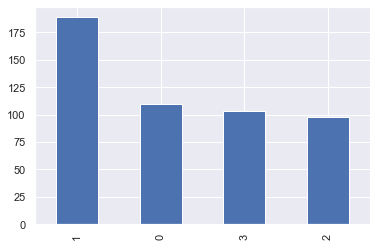

In [23]:
df_purchase_decsr['segment'].value_counts().plot.bar()

Analysis the segment data

In [24]:
df_purchase_decsr.groupby('segment').mean()

,Customer Visits,Numb times cust bought,Average Purchase
segment,,,
0,123.454545,39.827273,0.283102
1,113.730159,22.756614,0.201588
2,117.295918,34.602041,0.284478
3,117.699029,24.902913,0.212773


In [25]:
segment_mean=df_purchase_decsr.groupby('segment').mean()
segment_std=df_purchase_decsr.groupby('segment').std()

plotting this data in bar graph

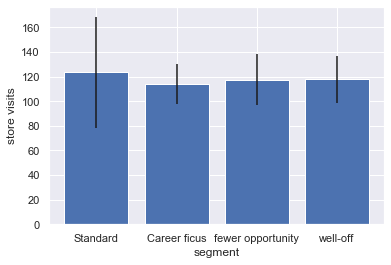

In [26]:
plt.bar(x=range(4),
        tick_label=['Standard',"Career ficus","fewer opportunity","well-off"],
        height=segment_mean['Customer Visits'],
        yerr=segment_std['Customer Visits'])
plt.xlabel("segment")
plt.ylabel("store visits")
plt.show()

## Brand Choice

In [27]:
df_purchase_incidence=df_purchase_predictor[df_purchase_predictor['Incidence']==1]

creating the different dataframe with seperate coulumns of brands 

In [28]:
df_dummies=pd.get_dummies(df_purchase_incidence['Brand'],prefix="Brand",prefix_sep='_')

df_dummies.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
6,0,1,0,0,0
11,0,0,0,0,1
19,1,0,0,0,0
24,0,0,0,1,0
29,0,1,0,0,0


In [29]:
df_dummies['segment']=df_purchase_incidence['segment']
df_dummies['ID']=df_purchase_incidence['ID']

In [30]:
df_dummies.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,segment,ID
6,0,1,0,0,0,1,200000001
11,0,0,0,0,1,1,200000001
19,1,0,0,0,0,1,200000001
24,0,0,0,1,0,1,200000001
29,0,1,0,0,0,1,200000001


In [31]:
temp=df_dummies.groupby('ID',as_index=True).mean()

In [32]:
mean_brand_choice=temp.groupby('segment',as_index=True).mean()

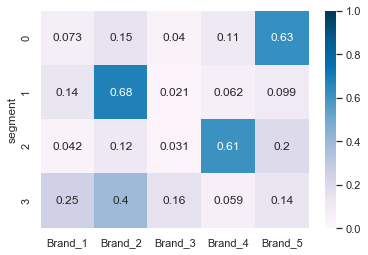

In [33]:
sns.heatmap(mean_brand_choice,
           vmin=0,
           vmax=1,
           annot=True,
           cmap='PuBu')

plt.show()

Revenue

In [34]:
temp1=df_purchase_predictor[df_purchase_predictor['Brand']==1]

In [35]:
temp1.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,1
556,200000006,636,1,1,5,0,0,1.31,1.56,2.00,...,0,0,0,0,39,1,112347,1,2,0
604,200000007,320,1,1,1,0,0,1.35,1.89,1.98,...,0,0,0,0,27,0,125190,2,1,0
799,200000009,374,1,1,2,0,0,1.21,1.87,2.02,...,0,0,0,0,25,0,108960,0,0,1
858,200000010,60,1,1,3,0,0,1.39,1.90,1.87,...,0,0,0,0,32,0,69370,0,0,1


In [36]:
temp1['Revenue Brand 1']=temp1['Quantity']*temp1['Price_1']

C:\Users\VTC\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
temp1.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,segment,Revenue Brand 1
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,0,0,0,47,1,110866,1,0,1,2.94
556,200000006,636,1,1,5,0,0,1.31,1.56,2.00,...,0,0,0,39,1,112347,1,2,0,6.55
604,200000007,320,1,1,1,0,0,1.35,1.89,1.98,...,0,0,0,27,0,125190,2,1,0,1.35
799,200000009,374,1,1,2,0,0,1.21,1.87,2.02,...,0,0,0,25,0,108960,0,0,1,2.42
858,200000010,60,1,1,3,0,0,1.39,1.90,1.87,...,0,0,0,32,0,69370,0,0,1,4.17


In [38]:
seg_revenue_df=temp1[['segment','Revenue Brand 1']].groupby('segment').sum()

seg_revenue_df

,Revenue Brand 1
segment,
0,736.09
1,2258.90
2,699.47
3,2611.19


In [40]:
temp2=df_purchase_predictor[df_purchase_predictor['Brand']==2]

temp2[['segment','Brand']].groupby('segment').sum()

,Brand
segment,
0,814
1,5916
2,538
3,1816


In [42]:
t2=temp2[['segment','Brand']].groupby('segment').sum()

In [46]:
seg_revenue_df=pd.concat([seg_revenue_df,t2],axis=1)

In [47]:
seg_revenue_df

,Revenue Brand 1,Brand
segment,,
0,736.09,814
1,2258.90,5916
2,699.47,538
3,2611.19,1816


In [51]:
seg_revenue_df.rename(columns={"Brand": "Revenuw Brand 2"},inplace=True)

In [52]:
seg_revenue_df

,Revenue Brand 1,Revenuw Brand 2
segment,,
0,736.09,814
1,2258.90,5916
2,699.47,538
3,2611.19,1816


In [53]:
temp3=df_purchase_predictor[df_purchase_predictor['Brand']==3]
t3=temp3[['segment','Brand']].groupby('segment').sum()
seg_revenue_df=pd.concat([seg_revenue_df,t3],axis=1)
seg_revenue_df.rename(columns={"Brand": "Revenuw Brand 3"},inplace=True)
seg_revenue_df

,Revenue Brand 1,Revenuw Brand 2,Revenuw Brand 3
segment,,,
0,736.09,814,345
1,2258.90,5916,351
2,699.47,538,264
3,2611.19,1816,1563


In [54]:
temp4=df_purchase_predictor[df_purchase_predictor['Brand']==4]
t4=temp4[['segment','Brand']].groupby('segment').sum()
seg_revenue_df=pd.concat([seg_revenue_df,t4],axis=1)
seg_revenue_df.rename(columns={"Brand": "Revenuw Brand 4"},inplace=True)
seg_revenue_df

,Revenue Brand 1,Revenuw Brand 2,Revenuw Brand 3,Revenuw Brand 4
segment,,,,
0,736.09,814,345,1388
1,2258.90,5916,351,1056
2,699.47,538,264,8756
3,2611.19,1816,1563,508


In [55]:
temp5=df_purchase_predictor[df_purchase_predictor['Brand']==5]
t5=temp5[['segment','Brand']].groupby('segment').sum()
seg_revenue_df=pd.concat([seg_revenue_df,t5],axis=1)
seg_revenue_df.rename(columns={"Brand": "Revenuw Brand 5"},inplace=True)
seg_revenue_df

,Revenue Brand 1,Revenuw Brand 2,Revenuw Brand 3,Revenuw Brand 4,Revenuw Brand 5
segment,,,,,
0,736.09,814,345,1388,16695
1,2258.90,5916,351,1056,2270
2,699.47,538,264,8756,3515
3,2611.19,1816,1563,508,2410


1) Segment-0 revenue highest in brand-5, so they prefer brand 5, even though price is highest compared to other four brands
2) Segment-1 revenue highest in brand-2, so they prefer brand 2, means they are money consious
3) Segment-3 prefers brand-4 , which is also of high price after prand-5
4) Segment-4 seems to be diverse in buying all brands, we should focus on brand 4 for this segment